In [51]:

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from bokeh.models import HoverTool

ModuleNotFoundError: No module named 'bokeh'

In [ ]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

In [ ]:
type(zipcodes)


In [ ]:
zipcodes.plot();


In [ ]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [ ]:
public_art = pd.read_csv('../data/Art_in_Public_Places.csv')
print(public_art.shape)
public_art.head(3)

In [ ]:
public_art['geometry'] = public_art.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
public_art.head(3)

In [ ]:
zipcodes.crs


In [ ]:
art_geo = gpd.GeoDataFrame(public_art, 
                           crs = zipcodes.crs, 
                           geometry = public_art['geometry'])

In [ ]:
type(art_geo)

In [52]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [53]:
art_by_zip = gpd.sjoin(art_geo, zipcodes, op = 'within')


In [54]:
art_by_zip.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491 36.16240),36,37201,NASHVILLE
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594 36.15961),36,37201,NASHVILLE
11,Orpheus and Eurydice,Kaskey,Ray,"1 Symphony Place, Nashville TN",Limestone,Sculpture,Relief sculpture above main entrance of Scherm...,36.16017,-86.77575,"(36.16017, -86.77575)",POINT (-86.77575 36.16017),36,37201,NASHVILLE
21,The Birth of Apollo,Eskridge,Casey,"1 Symphony Place, Nashville TN",Bronze sculpture as centerpiece of fountain,Sculpture,"Two figures topping a fountain, one with a lyr...",36.15993,-86.77611,"(36.15993, -86.77611)",POINT (-86.77611 36.15993),36,37201,NASHVILLE
24,The Recording Angel,Flack,Audrey,"1 Symphony Place, Nashville TN",Bronze,Sculpture,Bronze angel holding a fountain pen and tablet,36.15920,-86.77571,"(36.1592, -86.77571)",POINT (-86.77571 36.15920),36,37201,NASHVILLE


In [55]:
art_by_zip.drop(['Mapped Location'],axis =1)

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,geometry,index_right,zip,po_name
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.162400,-86.774910,POINT (-86.77491 36.16240),36,37201,NASHVILLE
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.159610,-86.775940,POINT (-86.77594 36.15961),36,37201,NASHVILLE
11,Orpheus and Eurydice,Kaskey,Ray,"1 Symphony Place, Nashville TN",Limestone,Sculpture,Relief sculpture above main entrance of Scherm...,36.160170,-86.775750,POINT (-86.77575 36.16017),36,37201,NASHVILLE
21,The Birth of Apollo,Eskridge,Casey,"1 Symphony Place, Nashville TN",Bronze sculpture as centerpiece of fountain,Sculpture,"Two figures topping a fountain, one with a lyr...",36.159930,-86.776110,POINT (-86.77611 36.15993),36,37201,NASHVILLE
24,The Recording Angel,Flack,Audrey,"1 Symphony Place, Nashville TN",Bronze,Sculpture,Bronze angel holding a fountain pen and tablet,36.159200,-86.775710,POINT (-86.77571 36.15920),36,37201,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,The Readers,Faxon,Russell,"3701 Benham Avenue, Nashville TN",bronze on bronze bench,Sculpture,NaN,36.109970,-86.809240,POINT (-86.80924 36.10997),44,37215,NASHVILLE
102,The Peace Monument,Moretti,Giuseppe,"3381-3399 Granny White Pike, Nashville TN",Bronze on Carrera marble base,Sculpture,The Ladies Battlefield Association commissione...,36.114650,-86.792330,POINT (-86.79233 36.11465),44,37215,NASHVILLE
104,Incline,Sorci,Joe,"2 Titans Way, East Bank Greenway, Nashville, TN",Salvaged industrial steel,Sculpture,NaN,36.164161,-86.772318,POINT (-86.77232 36.16416),31,37213,NASHVILLE
114,Threshold,Sorci,Joe,"2 Titans Way, Nashville TN",Found metal objects,Sculpture,Installation of found industrial metal.,36.165380,-86.773640,POINT (-86.77364 36.16538),31,37213,NASHVILLE


In [56]:
art_by_zip['zip'].value_counts()


37219    33
37203    25
37201    21
37210    11
37212    10
37205    10
37206     9
37208     7
37214     6
37221     6
37209     4
37204     4
37115     3
37240     2
37213     2
37215     2
37207     2
37211     2
37216     2
37076     1
Name: zip, dtype: int64

In [57]:
art_in_37219 = art_by_zip.loc[art_by_zip['zip'] == '37219']
art_in_37219.shape

(33, 14)

In [58]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

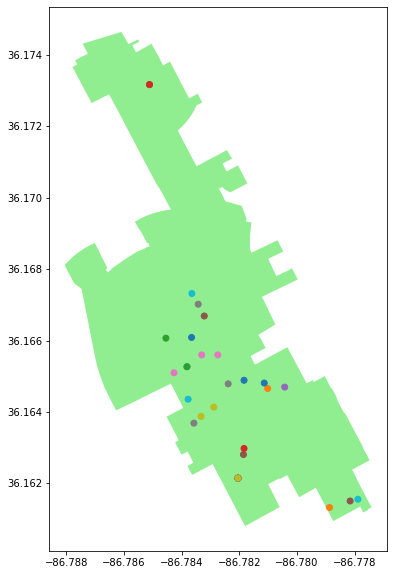

In [59]:
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
art_in_37219.plot( ax = ax, column = 'Title');
plt.show();

In [60]:
polygon37219.geometry.centroid


C:\Users\tomle\AppData\Local\Temp/ipykernel_21868/1803075763.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37219.geometry.centroid


24    POINT (-86.78317 36.16682)
dtype: geometry

In [61]:
center = polygon37219.geometry.centroid
print(center)

24    POINT (-86.78317 36.16682)
dtype: geometry


C:\Users\tomle\AppData\Local\Temp/ipykernel_21868/4223650497.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37219.geometry.centroid


In [62]:
area_center = [center.y, center.x]

In [63]:
print(area_center)

[24    36.166818
dtype: float64, 24   -86.783173
dtype: float64]


In [64]:
map_37219 = folium.Map(location =  area_center, zoom_start = 12)
map_37219

In [65]:
i = 0
for row_index, row_values in art_in_37219.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 4
values are:
 
Title                                                     Anticipation
Artist Last Name                                                 Faxon
Artist First Name                                              Russell
Location                            505 Deaderick Street, Nashville TN
Medium                                                Cold cast bronze
Type                                                         Sculpture
Description          A statue of a woman with legs crossed sitting ...
Latitude                                                      36.16489
Longitude                                                    -86.78184
Mapped Location                                  (36.16489, -86.78184)
geometry                                    POINT (-86.78184 36.16489)
index_right                                                         24
zip                                                              37219
po_name                                             

In [86]:
map_37219 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37219).add_to(map_37219)

for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title']), str(row_values['Description'])
    icon=folium.Icon(color="red",icon="paint-brush", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37219)
map_37219.save('../maps/map37219.html')

#display our map
map_37219